# Chapter 04. 신경망 학습

신경망 학습에 대해 배운다.

학습이란? 데이터로부터 가중치 매개변수의 최적값을 자동으로 얻는것

신경망이 학습할 수 있도록 하는 **지표** 인 **손실 함수(Loss Function)** 소개한다.

학습 목표: 손실함수의 결괏값을 가장 작게하는 가중치 매개변수를 찾는 것

손실 함수의 값을 작게 만드는 기법으로 **경사 하강법(Gradient Descent)** 가 있다.

## 4.1 데이터에서 학습한다!

신경망의 특징: 데이터를 보고 학습한다. $\rightarrow$ 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다.

### 4.1.1 데이터 주도 학습
기계학습에서 **데이터**는 매우 중요

문제를 풀때, 특히 패턴을 찾을 때, 
- **사람**은 경험, 직관을 이용하여 시행착오를 거듭하면서 문제 해결을 진행
- **기계학습**은 사람 개입을 최소화, 수집한 데이터로 부터 패턴을 찾으려 시도
- **신경망, 딥러닝**은 기계학습 보다 더 사랑ㅁ의 개입을 배제

e.g) MNIST 문제를 풀때 Algorithm or program을 처음부터 만들기 어려워 $\rightarrow$ image에서 **특징** 추출, 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다.

- 특징(feature): 입력 데이터에서 본질적인 데이터(중요한 데이터) 추출하는 **변환기**, 이 특징은 **벡터(vector)** 로 기술
    - Computer Vision 분야에서는 SIFT, SURF, HOG 등 특징 활용

특징을 사용해 데이터를 벡터로 변환, 이 변환된 데이터를 지도학습 대표 기법인 SVM, KNN 등으로 학습 가능하다.

모아진 데이터를 기계가 규칙을 찾는다. 처음부터 Algorithm을 설계하는 것보다 효율이 좋지만, 이 **특징** 을 **사람이 설계(개입)**, 문제에 따라 사람이 특징을 생각해야 한다.

문제 $\rightarrow$ 사람이 생각한 Algorithm $\rightarrow$ 결과

$(개선)\Rightarrow$ 문제 $\rightarrow$ 사람이 생각한 특징(SIFT, SURF, HOG etc...) $\rightarrow$ 기계학습(SVM, KNN) $\rightarrow$ 결과

$(개선)\Rightarrow$ 문제 $\rightarrow$ 신경망(딥러닝) $\rightarrow$ 결과

신경망(딥러닝)에서는 이미지를 '있는 그대로' 학습, 특징까지 기계가 스스로 학습(기계학습, 신경망(딥러닝) 과정에서는 사람의 개입이 없다.)

cf) 딥러닝을 **종단간 기계학습(end-to-end machine learning)** 이라고도 함 $\Rightarrow$ 데이터(입력)부터 결과(출력)까지 사람의 개입이 없다.

**신경망의 이점**: 모든 문제 같은 맥락에서 푼다 $\Rightarrow$ 모든 문제를 주어진 데이터 그대로 사용, 입력 데이터 활용 'end-to-end'로 학습 가능

### 4.1.2 훈련 데이터와 시험 데이터

기계학습에서는 데이터를 훈련 데이터와 시험 데이터로 나눈다. 

Why Split? **범용 능력** 평가를 위해 
- 범용 능력: 아직 보지 못한 data(training data에 없는)로 문제를 옳바르게 풀어내는 능력

한 데이터에만 지나치게  최적화 된 상태: **오버피팅(overfitting)**

## 4.2 손실 함수(Loss Function)

신경망 학습에서 현재 상태를 '하나의 지표'로 표현, 이 지표를 가장 좋게 하는 가중치 매개변수 값을 탐색하는 것이 목적

**손실 함수**: 신경망 학습에 사용되는 지표

일반적으로 손실함수로 "오차제곱합", "교차 엔트로피 오차" 를 사용

### 4.2.1 오차제곱합(Sum of Squares Error, SSE)

가장 많이 사용하는 손실 함수 오차제곱합(Sum of Squares Error, SSE)

각 원소의 출력(추정값)과 정답 레이블(참 값)의 차($y_k - t_k$)를 제곱(Squares) 후, 그 총합($\sum$)

- $E = \frac{1}{2} \sum_{k}(y_k - t_k)^2$
    - $y_k$: 신경망의 출력(신경망이 추정한 값)
    - $t_k$: 정답 레이블(One-hot-encoding)
    - $k$: 데이터의 차원 수
    - 신경망 출력 $y$는 Softmax function의 출력(확률로 해석 가능)

In [1]:
import numpy as np
import pandas as pd
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

ModuleNotFoundError: No module named 'pandas'

In [ ]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [2]:
sum_squares_error(np.array(y), np.array(t))

NameError: name 'sum_squares_error' is not defined

In [3]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum_squares_error(np.array(y), np.array(t))

NameError: name 'sum_squares_error' is not defined

오차가 작은 0.097이 정답에 더 가깝다.

### 4.2.2 교차 엔트로피 오차(Cross-Entropy Error, CEE)

CEE도 자주 사용

- $E = -\sum_k t_k \log{y_k}$
    - $y_k$: 신경망의 출력
    - $t_k$: 정답 레이블(One-Hot-Encoding)

$\Rightarrow$ 실질적으로 정답 시의 추정($t_k = 1$일때의 $y_k$) (y_k는 확률적인 값이고 그 값들의 총합은 1이다 (Softmax function의 출력이기때문에) $t_k$는 one-hot-encoding되어 정답 레이블인데 정답은 1 나머지는 0으로 수식에서 계산되면 정답 외의 값들은 0으로 처리된다.)

$\Rightarrow$ 교차 엔트로피 오차는 정답일때 **출력이 전체 값을 정한다.**
($y_k$의 값이 작다(확률이 작다)면 log가 취해서 전체 CEE의 값 자체가 커진다  $\rightarrow$ 오차가 커진다.)

<ipython-input-4-e47f3d2f8152>:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


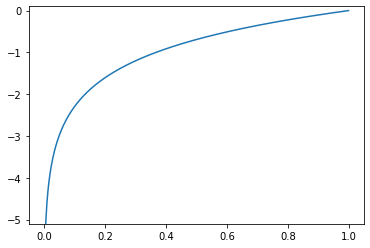

In [4]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.1, 0.1)  # y축의 범위를 지정
plt.show()

정답일 때의 출력(확률로 해석)이 작아질수록 오차는 커진다.

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7  # log 0은 -inf로 발산하게 되므로 아주 작은 값을 더했다.
    return -np.sum(t * np.log(y + delta))

In [6]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))
# 첫번째 결괏값이 더 작다(오차가 작다). 정답일 가능성이 높다고 판단.

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습

기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고 그 값을 최소화하는 매개변수를 찾는다. $\rightarrow$ 결국, 모든 훈련 데이터에 대한 손실 함수를 구해야한다.

- $E = -\sum_k t_k \log{y_k}$ (데이터 1개에 대한 Loss Function)
    - $y_k$: 신경망의 출력
    - $t_k$: 정답 레이블(One-Hot-Encoding)

(N개의 데이터로 확장, N으로 나누어 정규화) $\Rightarrow$

- $E = -\frac{1}{N}\sum_{n} \sum_k t_k \log{y_k}$ 
    - $y_k$: 신경망의 출력
    - $t_k$: 정답 레이블(One-Hot-Encoding)

N으로 나눠 **평균 손실 함수** 구해, But! 데이터가 커지면 시간 오래 걸린다.

$\Rightarrow$ 데이터 일부 추려 **근사치**를 이용 (일부: 미니배치(Mini-batch))

**미니배치 학습**: Training data 중 무작위로 뽑아 학습하는 것

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import pickle

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)  # 훈련 데이터 60,000개, 입력 데이터 784(28 x 28)
print(t_train.shape)  # 정답 레이블 (0 ~ 9)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 0 ~ train_size(60,000)에서 무작위로 batch_size(10)개를 뽑음
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

60000